In [1]:
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load
import sys
%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))
def viterbi(obs,Modelo1,PI):
    A, B= Modelo1.A , Modelo1.B
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)

def plot_cc_arrow(cc):
    fig=plt.figure(figsize=(10,10))
    for c in cc:
        ang=c[2]*180/math.pi
        

        plt.plot(c[0], c[1], marker=(3, 1,ang ), markersize=10,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2]+math.pi/2)), c[1]-(.01*np.sin(c[2]+math.pi/2)), marker=(1, 1,ang), markersize=25,c='green', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

In [4]:
both=False
data=pd.read_csv('dataset_candidatura_wr/lecs_odom(goodman).txt')

#data=data2
#data=data.iloc[:30000,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)
data.columns=etiquetas

if both:
    data2=pd.read_csv('dataset_candidatura_wr/lecs_odom(short distance).txt')
    data3=pd.read_csv('dataset_candidatura_wr/lecs_odom(goodman).txt')#'dataset_candidatura_wr/lecs_odom(goodman).txt'
    data2.columns,data3.columns=etiquetas,etiquetas
    data=pd.concat((data,data2,data3))
    

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,5)
data.iloc[:,0:n_reads]=lecs

data.describe()



,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R714,R715,R716,R717,R718,R719,R720,x,y,theta
count,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,...,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000
mean,1.968981,1.974375,1.974785,1.974469,1.973830,1.971698,1.969295,1.968657,1.965194,1.964131,...,1.844058,1.843981,1.846350,1.847477,1.848528,1.849610,1.850703,1.356175,2.452435,0.144713
std,1.049878,1.057772,1.059869,1.061713,1.061752,1.060802,1.059844,1.060608,1.059701,1.059111,...,0.935262,0.933657,0.937424,0.940018,0.941696,0.944158,0.946312,0.774155,1.350172,1.878428
min,0.426443,0.426465,0.426445,0.424923,0.424836,0.424520,0.423348,0.423476,0.422594,0.422392,...,0.391625,0.363851,0.359515,0.355293,0.351181,0.348181,0.349226,-0.196506,-0.069274,-3.141372
25%,1.244837,1.244395,1.243781,1.242657,1.242888,1.241186,1.240283,1.240331,1.239902,1.241728,...,1.216368,1.216115,1.216197,1.218699,1.219602,1.220703,1.224061,0.842793,1.006371,-1.528835
50%,1.752799,1.754201,1.755181,1.756971,1.757669,1.757518,1.757012,1.751673,1.745272,1.746330,...,1.716429,1.719303,1.721844,1.723620,1.728746,1.730286,1.731057,1.247488,2.793368,0.167726
75%,2.489995,2.485551,2.478290,2.470875,2.463181,2.455865,2.448519,2.441354,2.434042,2.426596,...,2.240525,2.242569,2.246129,2.251352,2.257604,2.263259,2.267050,2.063946,3.741621,1.729399
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.773765,4.515830,3.141566


In [5]:
print( 'There are ',data.isnull().sum().sum(),'nans','removing')
data.fillna(0,inplace=True)
print( 'There are ',data.isnull().sum().sum(),'nans','left')
lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,10)
data.iloc[:,0:n_reads]=lecs


('There are ', 0, 'nans', 'removing')
('There are ', 0, 'nans', 'left')


In [6]:
get_new_ccs=True
Q_aff=True
if get_new_ccs:
    
    K_corpus=256
    N=20
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    cc=mbk.cluster_centers_
    ccxyth=pd.DataFrame(cc)
    ccxyth['norm']=np.linalg.norm(cc,axis=1)
    #sort by proximity to origin
    cc=ccxyth.sort_values('norm').iloc[:,:3].values
    
else:
    ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
    print("CUANTIZANDO SIN RECALCULAR CC")
aus=[]
auvks=[]
for i,lec in zip(xyth.values, lecs.values):
    _, au= quantized(i , cc)
    aus.append(au)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
    auvks.append(auvk)
data['Y']=aus
data['Vk']=auvks


if (Q_aff==True):
    clf=load('aff_prop_class.joblib') ##PYTHON VERSION 2 
    data['Vk_aff']=clf.predict(lecs)


if (Q_aff!=True):
    data['Vk_aff']=data['Vk']

obs,est= data['Vk'].values,data['Y'].values
obs_aff= data['Vk_aff'].values
np.save('obs.npy',obs)
np.save('est.npy',est)
np.save ('ccxyth.npy',cc)
np.save ('ccvk.npy',ccvk)
data.to_csv('pddata.csv')    
print('new obs/ est almacenados')
data['Y'].describe()   

new obs/ est almacenados


count    14136.000000
mean         9.843166
std          5.778847
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: Y, dtype: float64

In [7]:
new_xyth=False
if new_xyth:

    xyth_symbols=data[['x','y','theta','Vk','Vk_aff']]
    mbk.fit(xyth_symbols)
    ccxyth_symbols=mbk.cluster_centers_
    ccxyth=ccxyth_symbols[:,:3]
    data.Y=mbk.labels_
    est= data['Y'].values



In [8]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
0,0.884895,0.882944,0.881031,0.879156,0.877319,0.875520,0.873757,0.872031,0.870342,0.868688,...,3.376319,3.352007,3.328156,3.304753,2.355445,4.095427,1.734082,18,186,49
1,0.884872,0.882922,0.881012,0.879139,0.877304,0.875506,0.873746,0.872022,0.870334,0.868683,...,3.374903,3.350619,3.326794,3.303416,2.355416,4.095451,1.734425,18,186,49
2,0.884840,0.882892,0.880984,0.879113,0.877280,0.875485,0.873726,0.872005,0.870319,0.868670,...,3.373422,3.349166,3.325369,3.302019,2.355390,4.095482,1.734785,18,186,49
3,0.884801,0.882857,0.880950,0.879082,0.877252,0.875458,0.873702,0.871983,0.870299,0.868652,...,3.371853,3.347628,3.323860,3.300539,2.355371,4.095522,1.735171,18,186,49
4,0.884759,0.882817,0.880913,0.879047,0.877219,0.875428,0.873674,0.871957,0.870276,0.868631,...,3.370189,3.345995,3.322259,3.298968,2.355348,4.095561,1.735578,18,186,49


In [9]:

data.to_csv('dataset_candidatura_wr/fast_load.csv')


In [10]:
save=True

In [11]:
####BAUM WELCH APPROX###############???!?!?!
if save:
    N=est.max()+1 
    K_corpus= obs.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est)+.00001)

    A,B=TRANS,EMIS
    PI=np.ones(N)/N
    Modelo1=HMM(A,B,PI)




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
    Modelo1=HMM(A,B,PI)
B.shape

MODEL SAVED


(20, 256)

In [12]:
obs2=data.Vk_aff.values
if save:
    ####BAUM WELCH APPROX  AFF PROP###############???!?!?!
    
    N=est.max()+1 
    K_corpus= obs2.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs2==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est))

    A,B=TRANS,EMIS
    PI=np.ones(N)/N

    Modelo2= HMM(A,B,PI)
    Modelo2.B=B
    Modelo2.A=A




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A2.npy',Modelo2.A)
    np.save('B2.npy',Modelo2.B)
    np.save('PI2.npy',Modelo2.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A2.npy'),np.load('B2.npy'),np.load('PI2.npy')
    Modelo2=HMM(A,B,PI)
B.shape

MODEL SAVED


(20, 318)

In [13]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
0,0.884895,0.882944,0.881031,0.879156,0.877319,0.875520,0.873757,0.872031,0.870342,0.868688,...,3.376319,3.352007,3.328156,3.304753,2.355445,4.095427,1.734082,18,186,49
1,0.884872,0.882922,0.881012,0.879139,0.877304,0.875506,0.873746,0.872022,0.870334,0.868683,...,3.374903,3.350619,3.326794,3.303416,2.355416,4.095451,1.734425,18,186,49
2,0.884840,0.882892,0.880984,0.879113,0.877280,0.875485,0.873726,0.872005,0.870319,0.868670,...,3.373422,3.349166,3.325369,3.302019,2.355390,4.095482,1.734785,18,186,49
3,0.884801,0.882857,0.880950,0.879082,0.877252,0.875458,0.873702,0.871983,0.870299,0.868652,...,3.371853,3.347628,3.323860,3.300539,2.355371,4.095522,1.735171,18,186,49
4,0.884759,0.882817,0.880913,0.879047,0.877219,0.875428,0.873674,0.871957,0.870276,0.868631,...,3.370189,3.345995,3.322259,3.298968,2.355348,4.095561,1.735578,18,186,49


In [14]:
def accuracy(yhat,ytrue):
    weights=[.5,.3,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [15]:


buf_vit=150
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

4488
(0.0, 0.0)


In [16]:
len(obs_windowed)

150

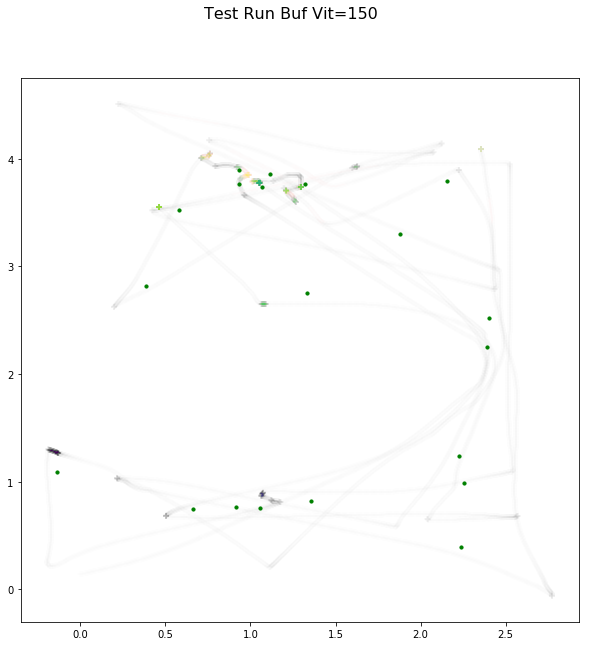

In [17]:

paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=150', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)





cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [18]:

def plot_cc_arrow(cc):
    fig=plt.figure(figsize=(10,10))
    for c in cc:
        ang=c[2]*180/math.pi
        

        plt.plot(c[0], c[1], marker=(3, 1,ang + 90 ), markersize=10,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang+ 90), markersize=25,c='green', linestyle='--')
        #plt.plot(c[0]-(.01*np.cos(c[2]+.5*math.pi)), c[1]-(.01*np.sin(c[2]+.5*math.pi)), marker=(1, 1,ang), markersize=25,c='blue', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

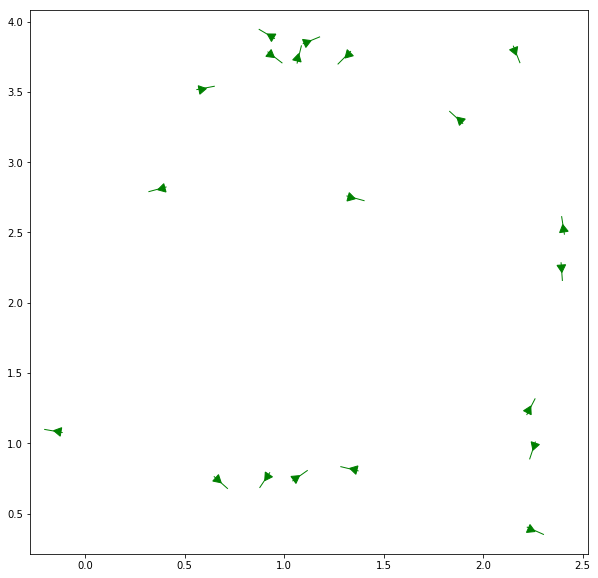

In [19]:
fig=plt.figure(figsize=(10,10))
plot_cc_arrow(cc)


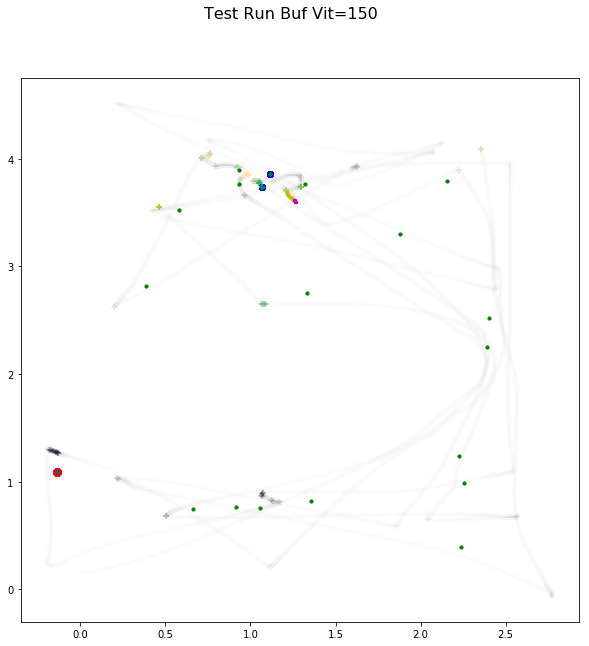

In [20]:
cc=ccxyth.sort_values('norm').iloc[:,:3].values
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=150', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='m',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [21]:



buf_vit=60
for i in range(1):
    
    
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

4488
(1.0, 0.0)


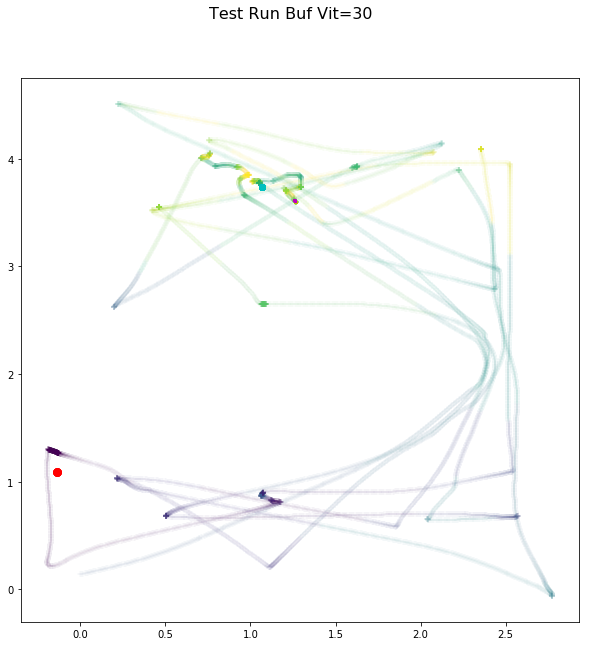

In [22]:
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=30', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='c' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')



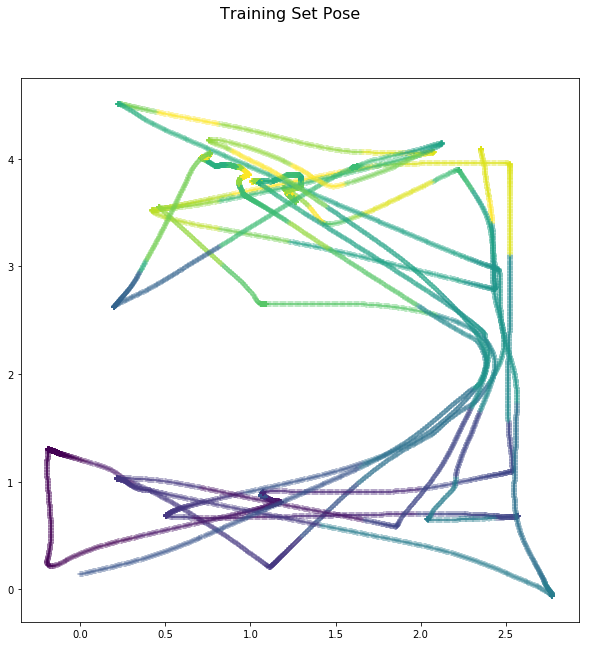

In [23]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Pose', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.3)


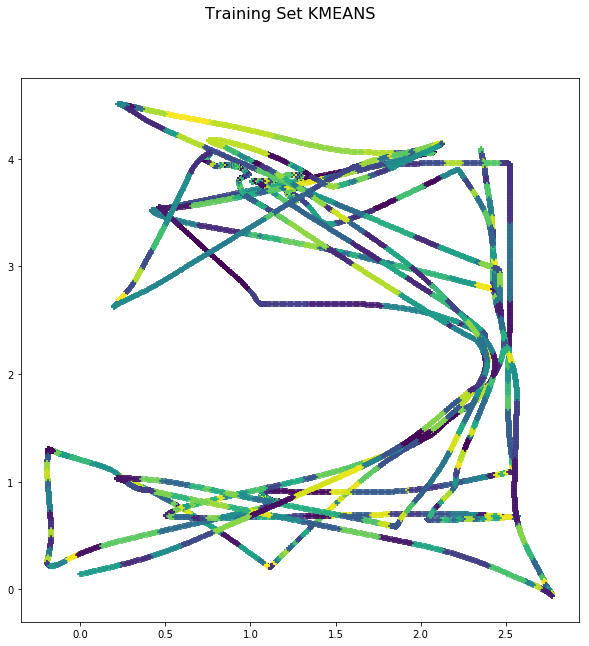

In [24]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk)


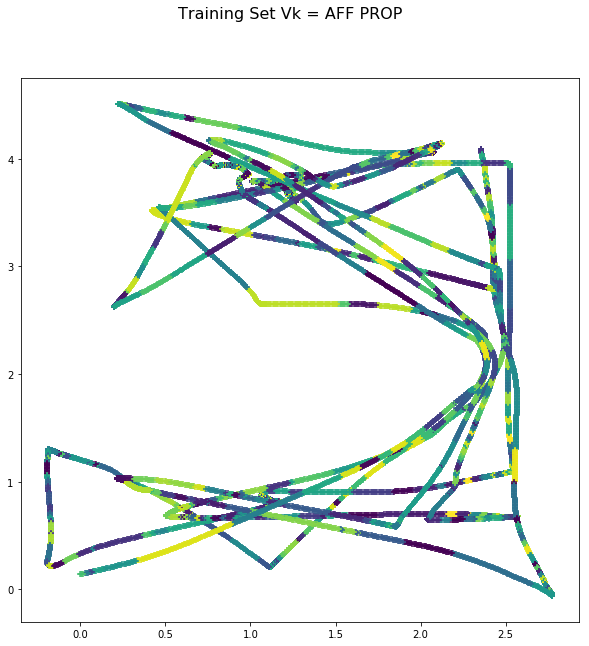

In [25]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Vk = AFF PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff)


In [26]:
data

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
0,0.884895,0.882944,0.881031,0.879156,0.877319,0.875520,0.873757,0.872031,0.870342,0.868688,...,3.376319,3.352007,3.328156,3.304753,2.355445,4.095427,1.734082,18,186,49
1,0.884872,0.882922,0.881012,0.879139,0.877304,0.875506,0.873746,0.872022,0.870334,0.868683,...,3.374903,3.350619,3.326794,3.303416,2.355416,4.095451,1.734425,18,186,49
2,0.884840,0.882892,0.880984,0.879113,0.877280,0.875485,0.873726,0.872005,0.870319,0.868670,...,3.373422,3.349166,3.325369,3.302019,2.355390,4.095482,1.734785,18,186,49
3,0.884801,0.882857,0.880950,0.879082,0.877252,0.875458,0.873702,0.871983,0.870299,0.868652,...,3.371853,3.347628,3.323860,3.300539,2.355371,4.095522,1.735171,18,186,49
4,0.884759,0.882817,0.880913,0.879047,0.877219,0.875428,0.873674,0.871957,0.870276,0.868631,...,3.370189,3.345995,3.322259,3.298968,2.355348,4.095561,1.735578,18,186,49
5,0.884716,0.882776,0.880875,0.879012,0.877186,0.875398,0.873646,0.871931,0.870253,0.868610,...,3.368527,3.344366,3.320660,3.297400,2.355328,4.095601,1.735987,18,186,49
6,0.884677,0.882739,0.880840,0.878979,0.877156,0.875369,0.873620,0.871907,0.870231,0.868591,...,3.366979,3.342847,3.319171,3.295939,2.355309,4.095637,1.736367,18,186,49
7,0.884640,0.882705,0.880808,0.878949,0.877127,0.875343,0.873596,0.871885,0.870211,0.868572,...,3.365612,3.341506,3.317856,3.294649,2.355293,4.095670,1.736704,18,186,49
8,0.884608,0.882674,0.880779,0.878922,0.877102,0.875320,0.873574,0.871865,0.870192,0.868555,...,3.364458,3.340374,3.316746,3.293560,2.355280,4.095698,1.736988,18,186,49
9,0.884581,0.882649,0.880755,0.878899,0.877081,0.875299,0.873555,0.871847,0.870176,0.868540,...,3.363546,3.339480,3.315869,3.292700,2.355273,4.095720,1.737213,18,186,49


In [27]:
ccxyth=cc
graphe= Markov_A_2_grafo(A,ccxyth)
ruta=dijkstra(1,6,graphe)


RUTA CALCULADA 


In [28]:

def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


In [29]:
graphe= Markov_A_2_grafo(A,ccxyth)


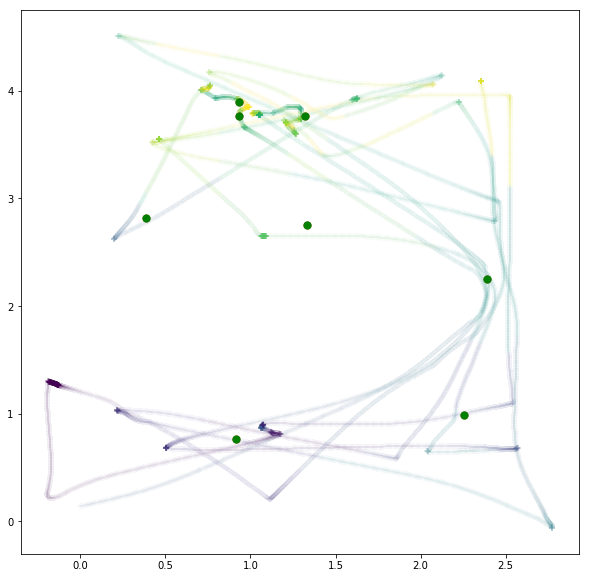

In [30]:
#ruta.append(nodofinal)
path=np.array(ruta)
path
cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)

cords_path2= path_to_xy(path,cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52 )


In [31]:

def dijkstra(nodoinicial,nodofinal,graphe):
    if (nodofinal > graphe.nodos.shape[0]):
        print ('Wrong dimensions for requested node')
        return None

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


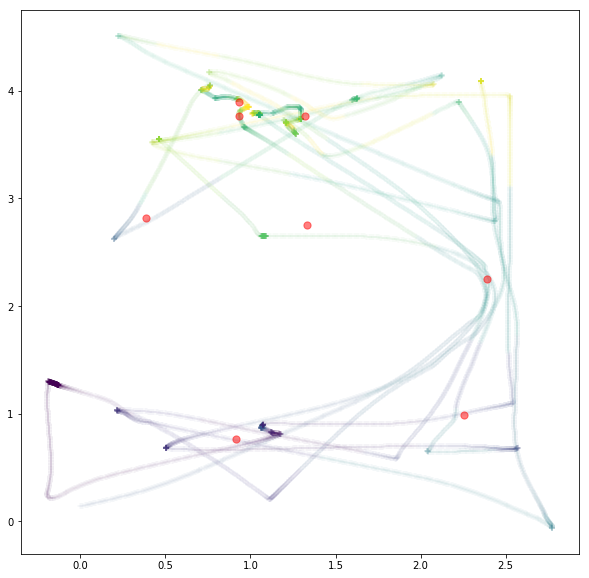

In [32]:
path=np.array(ruta)


cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)
#cords_path2= path_to_xy(path[int(len(path)/2):],cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
#ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52,alpha=.5 )

In [33]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 47)

47


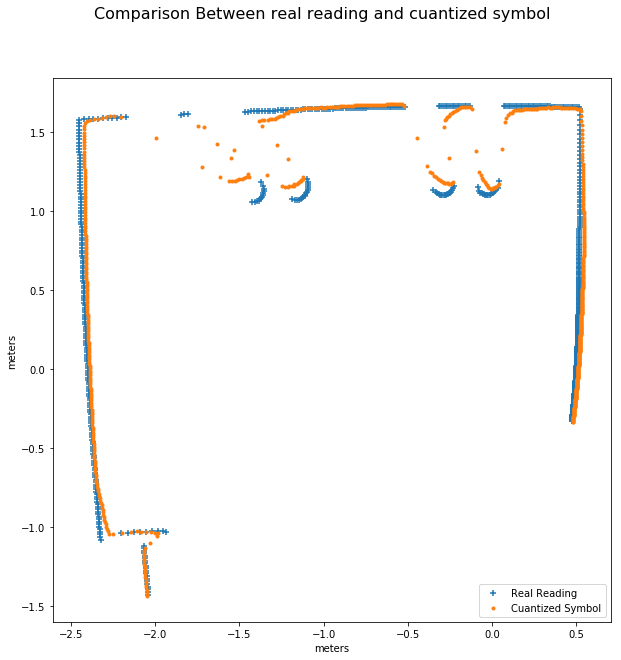

In [98]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real reading and cuantized symbol', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+',label='Real Reading')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='.',label= 'Cuantized Symbol')
ax1.legend()

In [99]:
lecs=data[data.Vk==lec_leida]
lecs.shape

(261, 727)

In [100]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

47


47


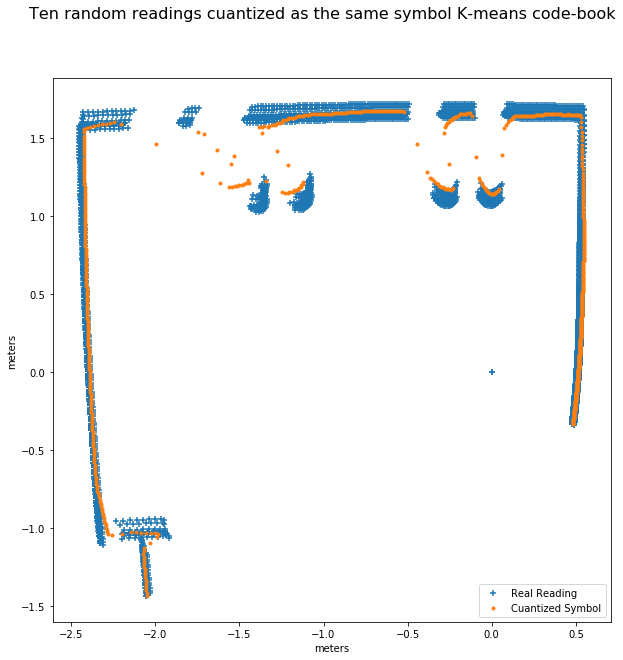

In [102]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Ten random readings cuantized as the same symbol K-means code-book', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+',label='Real Reading')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='.',label='Cuantized Symbol')
ax1.legend()
print(lec_leida)

In [38]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())


 
lec_deseada=aux.index[4]   ###CHOOSING 5th MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 5)

5


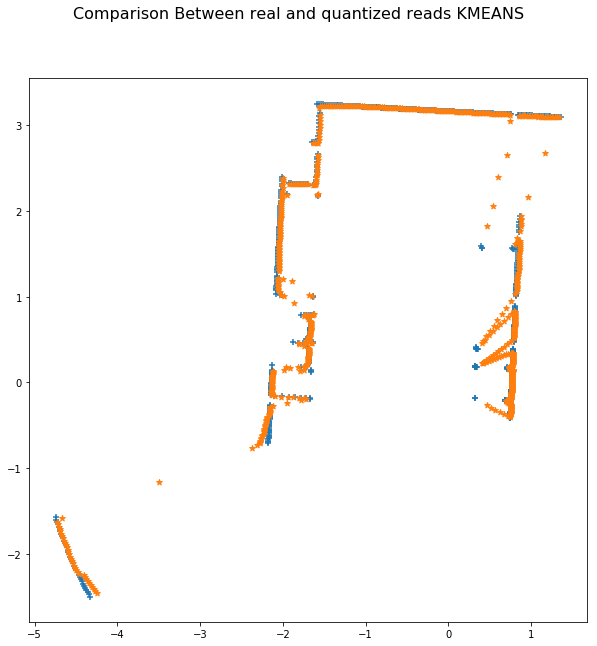

In [39]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real and quantized reads KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [40]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0 , replace=True).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

5


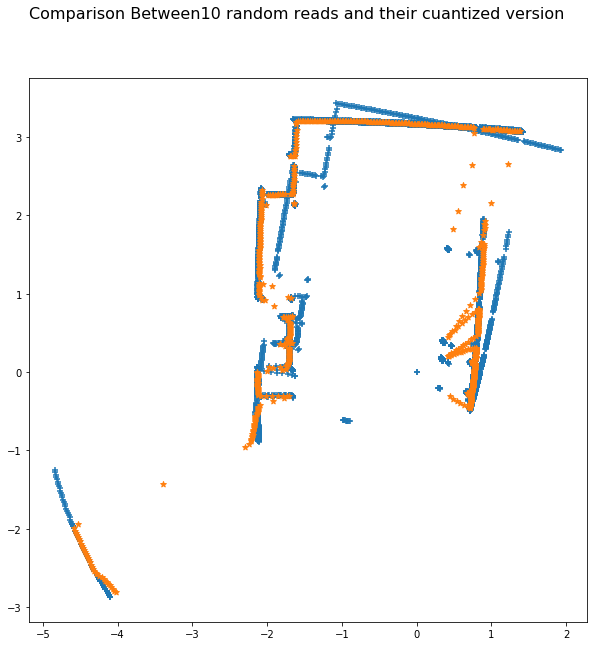

In [41]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between10 random reads and their cuantized version ' , fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

In [42]:
############################################################################################


In [43]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 35)

COMPARING AFF PROP READINGS NO centroid
35


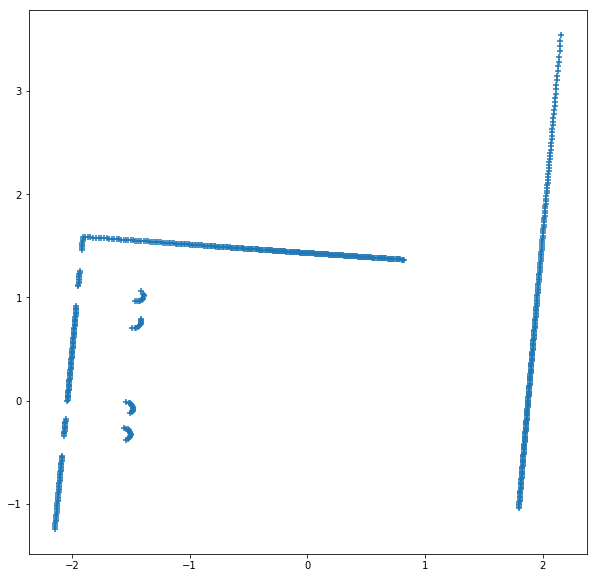

In [44]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

CORDS_ORIG = pd.DataFrame((cordsx,cordsy))
CORDS_ORIG=CORDS_ORIG.T
CORDS_ORIG.columns=['x','y']

In [45]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=20,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

35


35


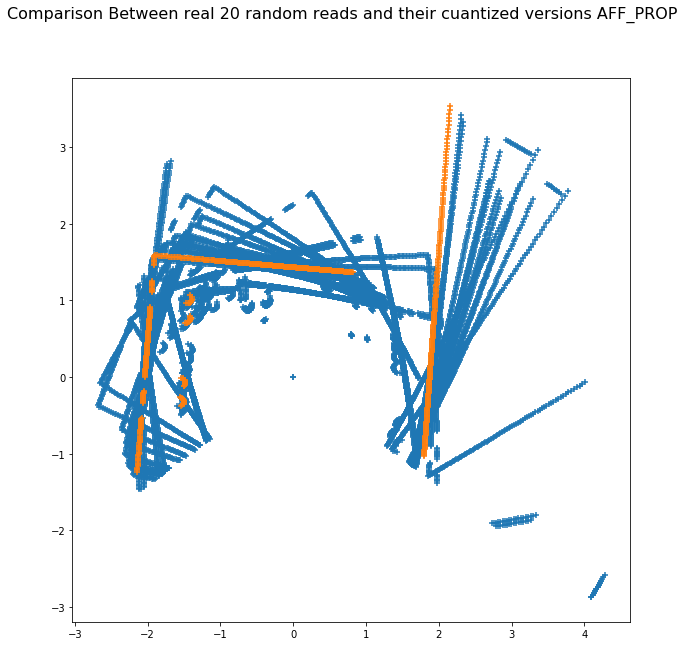

In [46]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 20 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x= CORDS_ORIG.x, y=CORDS_ORIG.y,marker='+')

print(lec_leida)

In [104]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[3]   ###CHOOSING 3rd MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 285)

COMPARING AFF PROP READINGS NO centroid
285
285
285


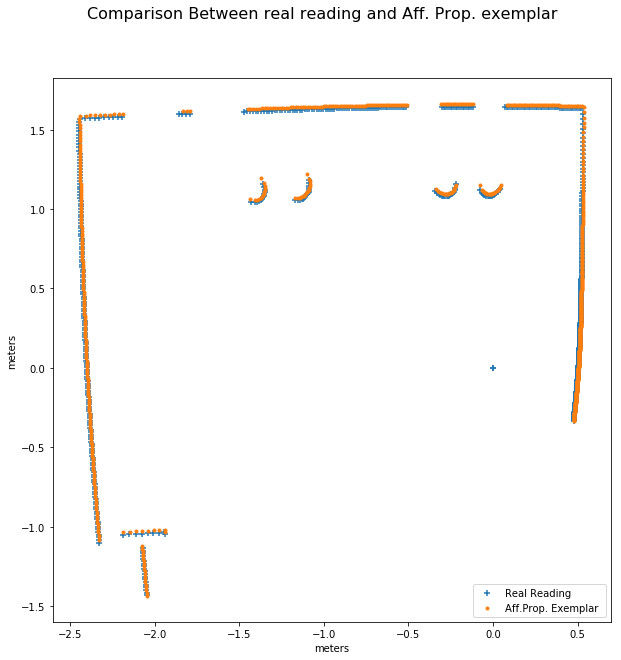

In [105]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=1,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real reading and Aff. Prop. exemplar', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')

ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+',label='Real Reading')
ax1.scatter(x= CORDS_ORIG.x, y=CORDS_ORIG.y,marker='.',label='Aff.Prop. Exemplar ')
ax1.legend()
print(lec_leida)

In [110]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=7,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

285


AttributeError: 'AxesSubplot' object has no attribute 'label'

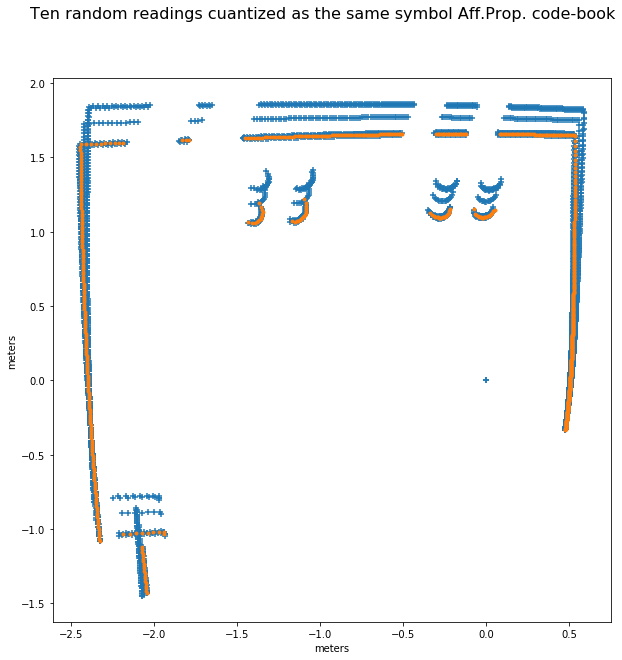

In [112]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Ten random readings cuantized as the same symbol Aff.Prop. code-book', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+',label='Real Reading')
ax1.scatter(x= CORDS_ORIG.x, y=CORDS_ORIG.y,marker='.',label='Aff.Prop. Exemplar ')
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')
ax1.label()
print(lec_leida)

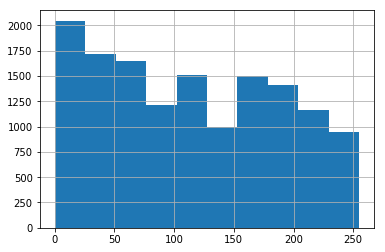

In [51]:
data.Vk.hist()

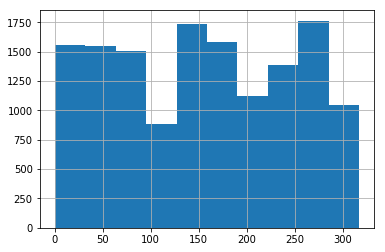

In [52]:
data.Vk_aff.hist()

(<matplotlib.collections.PathCollection at 0x7f4b11b80690>,
                 x           y     Vk      Y
 count  261.000000  261.000000  261.0  261.0
 mean     1.089729    2.657921   47.0   14.0
 std      0.057562    0.024696    0.0    0.0
 min      0.983789    2.650671   47.0   14.0
 25%      1.067837    2.650941   47.0   14.0
 50%      1.077903    2.651136   47.0   14.0
 75%      1.088090    2.651310   47.0   14.0
 max      1.327007    2.795157   47.0   14.0)

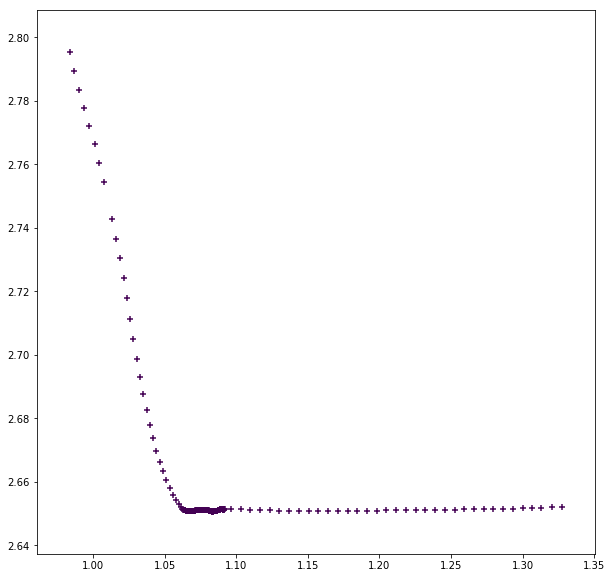

In [53]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','Vk','Y']][data.Vk==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7f4b2f517090>,
                 x           y       theta          Vk           Y
 count  751.000000  751.000000  751.000000  751.000000  751.000000
 mean     0.487314    2.492046    1.781163   86.715047   10.063915
 std      0.509218    0.923532    1.334262   78.690152    7.076433
 min     -0.160765    1.266934   -0.053830   17.000000    0.000000
 25%     -0.137319    1.280697   -0.044440   17.000000    0.000000
 50%      0.462307    2.651132    2.198745   47.000000   14.000000
 75%      1.068948    3.549123    3.129762  198.000000   16.000000
 max      1.327007    3.565214    3.136250  198.000000   16.000000)

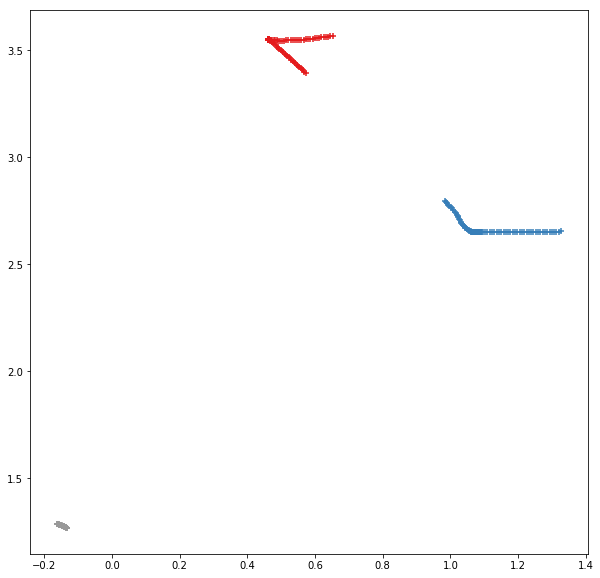

In [54]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','theta','Vk','Y']][data.Vk==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk,marker='+',cmap='Set1'),xy.describe()

(<matplotlib.collections.PathCollection at 0x7f4b2f7f7350>,
                 x           y  Vk_aff           Y
 count  439.000000  439.000000   439.0  439.000000
 mean     1.224842    3.472200    35.0   14.209567
 std      0.147807    0.730010     0.0    3.718005
 min      0.710282    0.657833    35.0    1.000000
 25%      1.161706    3.600965    35.0   15.000000
 50%      1.266949    3.687745    35.0   15.000000
 75%      1.298820    3.741539    35.0   15.000000
 max      1.666056    3.822348    35.0   19.000000)

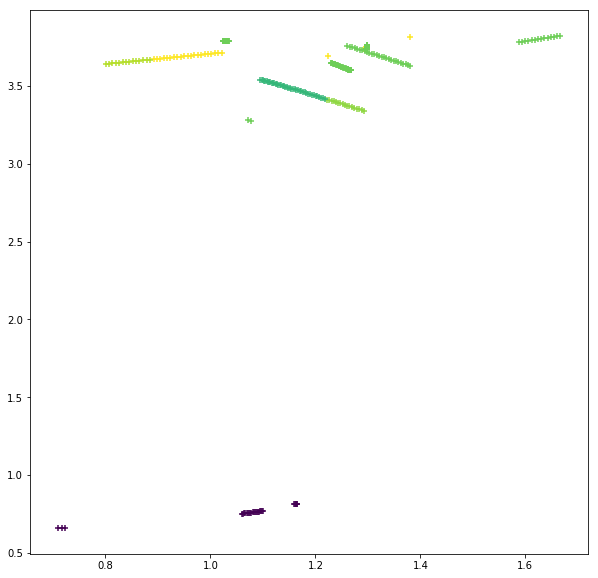

In [55]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','Vk_aff','Y']][data.Vk_aff==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7f4b11b97790>,
                  x            y        theta       Vk_aff            Y
 count  1230.000000  1230.000000  1230.000000  1230.000000  1230.000000
 mean      0.773839     2.866047    -1.318635    62.402439    11.128455
 std       0.686939     1.203656     1.340279    57.070737     8.092513
 min      -0.188394     0.106551    -2.983544     8.000000     0.000000
 25%      -0.148640     1.292041    -2.567510     8.000000     0.000000
 50%       1.011539     3.647448    -1.681805    35.000000    15.000000
 75%       1.266927     3.788692    -0.052767   141.000000    19.000000
 max       2.717109     4.386005     1.806532   141.000000    19.000000)

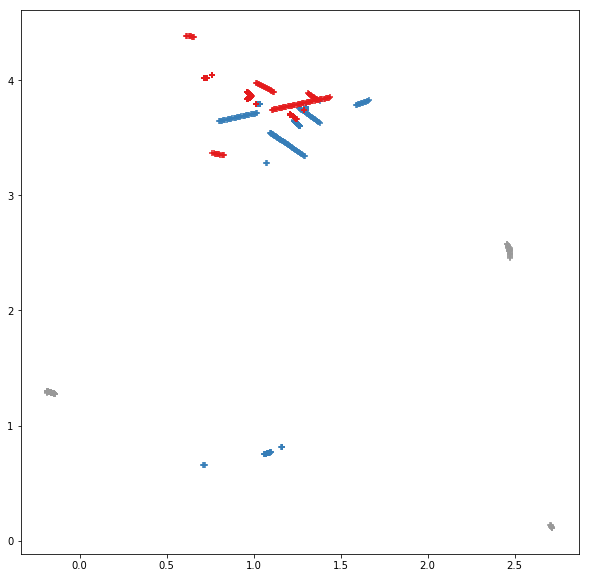

In [56]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk_aff,marker='+',cmap='Set1'),xy.describe()

In [57]:
aux=pd.DataFrame(data.Vk.value_counts())
cents=[]
for i in aux.index[:3]:
    print (data[data.Vk==i][['x','y','theta']].describe())
    cents.append(data[data.Vk==i][['x','y','theta']].mean(axis=0))

aux=pd.DataFrame(data.Vk_aff.value_counts())
cents_aff=[]
for i in aux.index[:3]:
    print (data[data.Vk_aff==i][['x','y','theta']].describe())
    cents_aff.append(data[data.Vk_aff==i][['x','y','theta']].mean(axis=0))

                x           y       theta
count  261.000000  261.000000  261.000000
mean     1.089729    2.657921    3.123243
std      0.057562    0.024696    0.029344
min      0.983789    2.650671    2.917226
25%      1.067837    2.650941    3.129355
50%      1.077903    2.651136    3.131346
75%      1.088090    2.651310    3.133249
max      1.327007    2.795157    3.136250
                x           y       theta
count  246.000000  246.000000  246.000000
mean    -0.145342    1.275951   -0.048754
std      0.008423    0.005230    0.007525
min     -0.160765    1.266934   -0.053830
25%     -0.152662    1.271230   -0.053196
50%     -0.144615    1.276116   -0.052918
75%     -0.137671    1.280434   -0.044799
max     -0.133162    1.284767   -0.026587
                x           y       theta
count  244.000000  244.000000  244.000000
mean     0.480768    3.540677    2.190496
std      0.040931    0.030193    0.029228
min      0.460886    3.393385    2.000303
25%      0.461961    3.549255    2

In [58]:
cents_aff=np.asarray(cents_aff)

In [59]:
cents_aff

array([[ 1.22484185,  3.47219971, -1.21092538],
       [ 0.05723243,  1.33578474, -0.20330314],
       [ 1.03560193,  3.84065576, -2.66885142]])

In [60]:
cents

[x        1.089729
 y        2.657921
 theta    3.123243
 dtype: float64, x       -0.145342
 y        1.275951
 theta   -0.048754
 dtype: float64, x        0.480768
 y        3.540677
 theta    2.190496
 dtype: float64]

In [61]:
import math
def plot_cc_arrow(cc):
    for c in cc:
        ang=c[2]*180/math.pi
        plt.plot(c[0], c[1], marker=(3, 1,ang+.5*math.pi ), markersize=10,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2]+math.pi/2)), c[1]-(.01*np.sin(c[2]+math.pi/2)), marker=(1, 1,ang+.5*math.pi), markersize=25,c='green', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

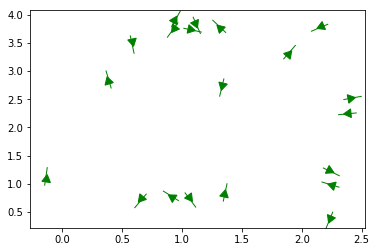

In [62]:
plot_cc_arrow(cc)

/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


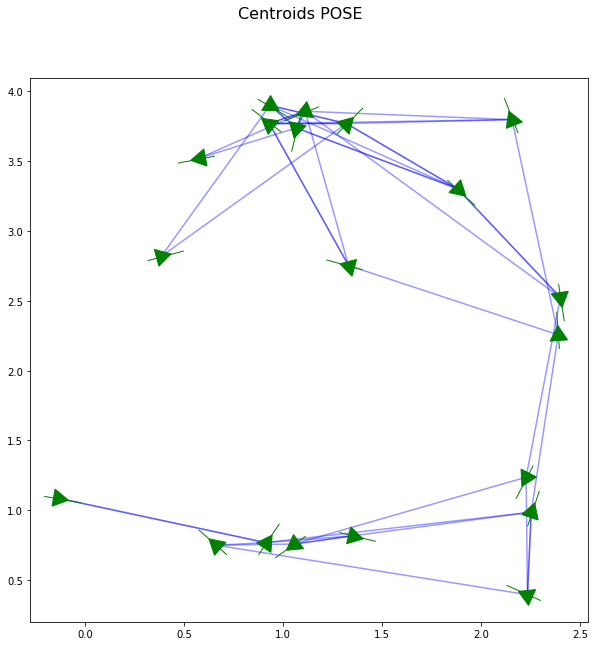

In [63]:
cc=ccxyth



x=np.linspace(0,.4)
fig = plt.figure(figsize=(10,10))
fig.suptitle('Centroids POSE', fontsize=16)
euclD=np.zeros((N,N,1))
ss= np.arange(len(A))
for s1 in ss:
    for s2 in ss:
        if (s1!=s2)and (A[s1,s2]!=0):# and (np.linalg.norm(ccxyth[s1,:2]-ccxyth[s2,:2])<1)   :#and(s1==s or s2==s)
            xvalues=[ccxyth[s1,0],ccxyth[s2,0]]
            yvalues=[ccxyth[s1,1],ccxyth[s2,1]]
            euclD[s1,s2]=np.linalg.norm(ccxyth[s1,:2]-ccxyth[s2,:2])

            ax1 = fig.add_subplot(111)

            plt.plot(xvalues,yvalues ,alpha=.4 ,c='b' )
         
            scatter= ax1.scatter(x= ccxyth[s1,0], y=ccxyth[s1,1],c='b' ,marker='.',s=100)
            scatter= ax1.scatter(x= ccxyth[s2,0], y=ccxyth[s2,1],c='b' ,marker='.',s=100)
            #scatter= ax1.scatter(x= trans[s1,s2,0], y=trans[s1,s2,1],c='b' ,marker='|',s=140)
for c in cc:
        ang=c[2]*180/math.pi
        plt.plot(c[0], c[1], marker=(3, 1,ang - 90 ), markersize=20,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang- 90), markersize=50,c='green', linestyle='--')




In [64]:
np.cos(cc[1,2]), np.sin(cc[1,2])

(0.556134765709984, 0.8310921262824605)

In [65]:
cc[1,2]

0.9810685924212662

In [66]:

import math
math.pi

3.141592653589793

In [67]:
cc

array([[-0.13813543,  1.08564901, -0.17310757],
       [ 0.91283501,  0.76649568,  0.98106859],
       [ 1.3533496 ,  0.81527585, -0.23798052],
       [ 0.66191439,  0.74780925,  2.4154306 ],
       [ 2.25348666,  0.98458098,  1.24962425],
       [ 1.05478628,  0.75607934, -2.52523959],
       [ 0.38514323,  2.81777442,  0.26241536],
       [ 2.22772853,  1.23517628, -2.04845603],
       [ 2.23458095,  0.39325234,  2.72215488],
       [ 2.38936754,  2.25564361,  1.64361087],
       [ 2.40048545,  2.52352858, -1.41703294],
       [ 1.88140511,  3.30320374, -0.74185051],
       [ 0.93447511,  3.90007707, -0.53402308],
       [ 1.32034946,  3.77023961,  0.7870671 ],
       [ 1.33118428,  2.75227856,  2.87554579],
       [ 1.06736976,  3.73860227, -1.81241856],
       [ 0.93107572,  3.77003743,  2.48279422],
       [ 0.58031834,  3.52322822, -2.9546431 ],
       [ 2.15652752,  3.79840491,  1.94490753],
       [ 1.11202779,  3.85810449, -2.75173746]])

In [68]:
cc=ccxyth.sort_values('norm').iloc[:,:3].values
cc

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [ ]:
cc=np.load('ccxyth.npy')

In [ ]:
cc

In [ ]:
obs2=np.asarray([29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 42, 42, 42, 42, 42, 42, 42, 23, 48, 48, 48, 48, 48, 48])


In [ ]:
Modelo2

In [ ]:

viterbi(obs2[-20:-10],Modelo2,PI)

In [ ]:
from utils_hmm import forw_alg


In [ ]:
forw_alg(obs2[5:10],Modelo2)

In [ ]:
obs2[0]

In [ ]:
Modelo2.B.shape

In [ ]:
Modelo2.B[4,:]

In [ ]:
def plot_lec(lec):
    cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
    CORDS=pd.DataFrame((cordsx,cordsy))
    CORDS=CORDS.T
    CORDS.columns=['x','y']
    plt.scatter(CORDS.x , CORDS.y)
    return CORDS.T

In [ ]:
lec= data.iloc[0,0:721].values
lec1= data.iloc[100,0:721].values

In [ ]:
xy=plot_lec(lec1).values

In [ ]:
xy_ref=plot_lec(lec).values

In [ ]:
def plot_data(data_1, data_2, label_1, label_2, markersize_1=8, markersize_2=8):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.axis('equal')
    if data_1 is not None:
        x_p, y_p = data_1
        ax.plot(x_p, y_p, color='#336699', markersize=markersize_1, marker='o', linestyle=":", label=label_1)
    if data_2 is not None:
        x_q, y_q = data_2
        ax.plot(x_q, y_q, color='orangered', markersize=markersize_2, marker='o', linestyle=":", label=label_2)
    ax.legend()
    return ax

def plot_values(values, label):
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(111)
    ax.plot(values, label=label)
    ax.legend()
    ax.grid(True)
    plt.show()
    
def animate_results(P_values, Q, corresp_values, xlim, ylim):
    """A function used to animate the iterative processes we use."""
    fig = plt.figure(figsize=(10, 6))
    anim_ax = fig.add_subplot(111)
    anim_ax.set(xlim=xlim, ylim=ylim)
    anim_ax.set_aspect('equal')
    plt.close()
    x_q, y_q = Q
    # draw initial correspondeces
    corresp_lines = []
    for i, j in correspondences:
        corresp_lines.append(anim_ax.plot([], [], 'grey')[0])
    # Prepare Q data.
    Q_line, = anim_ax.plot(x_q, y_q, 'o', color='orangered')
    # prepare empty line for moved data
    P_line, = anim_ax.plot([], [], 'o', color='#336699')

    def animate(i):
        P_inc = P_values[i]
        x_p, y_p = P_inc
        P_line.set_data(x_p, y_p)
        draw_inc_corresp(P_inc, Q, corresp_values[i])
        return (P_line,)
    
    def draw_inc_corresp(points_from, points_to, correspondences):
        for corr_idx, (i, j) in enumerate(correspondences):
            x = [points_from[0, i], points_to[0, j]]
            y = [points_from[1, i], points_to[1, j]]
            corresp_lines[corr_idx].set_data(x, y)
    
    anim = animation.FuncAnimation(fig, animate,
                                   frames=len(P_values), 
                                   interval=500, 
                                   blit=True)
    return HTML(anim.to_jshtml())

In [ ]:
xy.shape

In [ ]:
Q = true_data
P = moved_data

plot_data(xy_ref, xy, "P: moved data", "Q: true data")


In [ ]:
def get_correspondence_indices(P, Q):
    """For each point in P find closest one in Q."""
    p_size = P.shape[1]
    q_size = Q.shape[1]
    correspondences = []
    for i in range(p_size):
        p_point = P[:, i]
        min_dist = sys.maxsize
        chosen_idx = -1
        for j in range(q_size):
            q_point = Q[:, j]
            dist = np.linalg.norm(q_point - p_point)
            if dist < min_dist:
                min_dist = dist
                chosen_idx = j
        correspondences.append((i, chosen_idx))
    return correspondences

def draw_correspondeces(P, Q, correspondences, ax):
    label_added = False
    for i, j in correspondences:
        x = [P[0, i], Q[0, j]]
        y = [P[1, i], Q[1, j]]
        if not label_added:
            ax.plot(x, y, color='grey', label='correpondences')
            label_added = True
        else:
            ax.plot(x, y, color='grey')
    ax.legend()

In [ ]:
def center_data(data, exclude_indices=[]):
    reduced_data = np.delete(data, exclude_indices, axis=1)
    center = np.array([reduced_data.mean(axis=1)]).T
    return center, data - center

center_of_P, P_centered = center_data(xy)
center_of_Q, Q_centered = center_data(xy_ref)
ax = plot_data(P_centered, Q_centered,
               label_1='Moved data centered',
               label_2='True data centered')
plt.show()

In [ ]:
correspondences = get_correspondence_indices(P_centered, Q_centered)
ax = plot_data(P_centered, Q_centered,
               label_1='P centered',
               label_2='Q centered')
draw_correspondeces(P_centered, Q_centered, correspondences, ax)
plt.show()